In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tablo ve veriler ile çalışmak için pandas import edildi
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error # regresyon performansı hesaplamaları için
import matplotlib.pyplot as plt

# CarData veri kümesinde araba ağırlıkları, motor hacimi ve CO2 salınım
# verileri var

data=pd.read_json("https://storage.googleapis.com/tfjs-tutorials/carsData.json")
print(data)

# Veri kümelerinde eksik veri olabilir. Boş hücre olabilir.
# isnull().sum() sütunlardaki eksik veri sayısını verir. Eğer sıfır ise veri tamdır.
print(data.isnull().sum())
print(data.isna().sum())

                          Name  Miles_per_Gallon  Cylinders  Displacement  \
0    chevrolet chevelle malibu              18.0          8         307.0   
1            buick skylark 320              15.0          8         350.0   
2           plymouth satellite              18.0          8         318.0   
3                amc rebel sst              16.0          8         304.0   
4                  ford torino              17.0          8         302.0   
..                         ...               ...        ...           ...   
401            ford mustang gl              27.0          4         140.0   
402                  vw pickup              44.0          4          97.0   
403              dodge rampage              32.0          4         135.0   
404                ford ranger              28.0          4         120.0   
405                 chevy s-10              31.0          4         119.0   

     Horsepower  Weight_in_lbs  Acceleration        Year  Origin  
0       

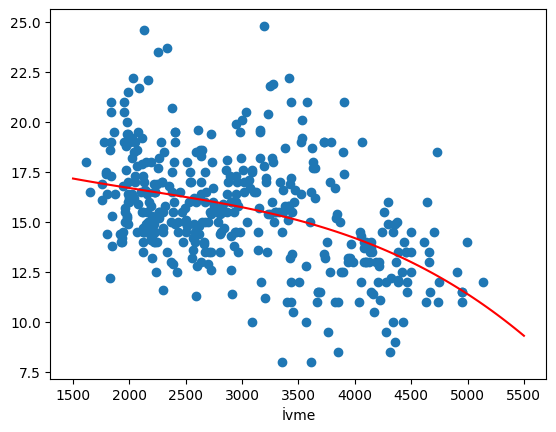

In [ ]:

# Yakıt tüketi mil başına galon ile aracın beygirgücü olarak güç tahhmini
# tahmin eden lineer regresyon modeli elde edelim.
# Pansas Dataframe den numpy dizisine çeviri
#data.to_nupy
#x = data['Cylinders'].to_numpy
#y = data['Acceleration'].to_numpy
# Pansas Dataframe den list dizisine çeviri
#x = data['Miles_per_Gallon'].tolist()
#y = data['Horsepower'].tolist()

x = data['Weight_in_lbs']
y = data['Acceleration']

# verilere 3. derece polinom ile modlleyelim.
polymodel=np.polyfit(x, y, 3)
# Modeli bir polinom fonksiyonuna dönüştürelim
Accel = np.poly1d(polymodel)

# Deney 1:
# linspace ile 1500 den 5500 kadar eşit aralıklı 100 değerli oluşturalım
# Böylece polinomun çıkış eğrisi çizimde detaylı bir şekilde görülebilir.
x1 = np.linspace(1500, 5500, 100)

# Gerçek verilerde belirsizlik, gürültü gibi nedenlerden dolayı çok dağınık olabilir.
# Bir regresyon modeli kabaca verideki trendi yakalabilir. Buda tahmin için iyi bir yaklaşıklık sağalabilir.
plt.scatter(x, y)
plt.plot(x1, Accel(x1),'r')
plt.xlabel('Ağırlık')
plt.xlabel('İvme')
plt.show()

In [ ]:
# 2100 kg araç için ivmesini tahmin edelim.
print(Accel(2100))

16.605620332841134


<ipython-input-4-3efc2e6c15db>:3: RankWarning: Polyfit may be poorly conditioned
  polymodel1=np.polyfit(x, y, 30)


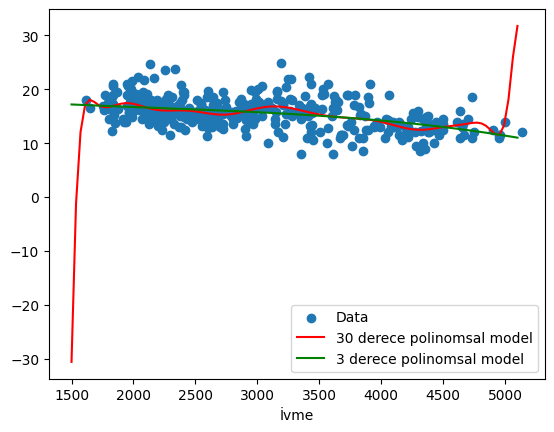

In [ ]:
# Deney 1: Polinom derecesi artırılarak model karmaşıklığı artırılırsa ne olur.
# verilere 30. derece polinom ile modelleyelim.
polymodel1=np.polyfit(x, y, 30)
# Modeli bir polinom fonksiyonuna dönüştürelim
Accel1 = np.poly1d(polymodel1)

# Deney 1:
# linspace ile 1500 den 5500 kadar eşit aralıklı 100 değerli oluşturalım
# Böylece polinomun çıkış eğrisi çizimde detaylı bir şekilde görülebilir.
x1 = np.linspace(1500, 5100, 100)


plt.scatter(x, y)
plt.plot(x1, Accel1(x1),'r')
plt.plot(x1, Accel(x1),'g')
plt.xlabel('Ağırlık')
plt.xlabel('İvme')
plt.legend(["Data","30 derece polinomsal model","3 derece polinomsal model"])
plt.show()

In [ ]:
# Veri kümesi bölgesi dışından bir ağırlık olan 1300 kg araç için ivmesini tahmin edelim.
# Görüleceği üzere 3. derece model verilerdeki trend yada sisteme ait bilgiyi daha iyi temsil etmekte.
print('3. derece polinomsal model tahmini',Accel(1300))
print('30. derece polinomsal model tahmini',Accel1(1300))

3. derece polinomsal model tahmini 17.384720495224855
30. derece polinomsal model tahmini -1454.4706230573356
